# Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on a synthetic health insurance dataset.  
The objective is to understand the data structure, feature characteristics, missing values, and the behavior of the target variable prior to model development.

The analysis focuses on validating modeling assumptions rather than building predictive models.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving insurance_dataset.csv to insurance_dataset.csv


In [ ]:
df = pd.read_csv("insurance_dataset.csv")
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [ ]:
df.shape


(1000000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [ ]:
df.columns


Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

In [ ]:
df.describe()


,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [ ]:
df.isnull().sum()


,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,250762
family_medical_history,250404
exercise_frequency,0
occupation,0


## Missing Value Analysis

Missing values are observed primarily in the medical history and family medical history variables.  
These missing entries likely represent the absence of reported conditions rather than random data loss.

No imputation is performed at this stage, as EDA focuses on understanding data characteristics rather than preprocessing decisions.


In [ ]:
numeric_features = ["age", "bmi", "children", "charges"]

categorical_features = [
"gender",
"smoker",
"region",
"medical_history",
"family_medical_history",
"exercise_frequency",
"occupation",
"coverage_level"
]

numeric_features, categorical_features


(['age', 'bmi', 'children', 'charges'],
 ['gender',
  'smoker',
  'region',
  'medical_history',
  'family_medical_history',
  'exercise_frequency',
  'occupation',
  'coverage_level'])

## Feature Categorization

Features can be broadly categorized as follows:

- **Demographic:** age, gender, region  
- **Medical:** BMI, medical history, family medical history  
- **Lifestyle:** smoking status, exercise frequency, occupation  
- **Target:** medical charges  

Sensitive attributes such as gender are identified early and reserved for fairness analysis rather than model training.


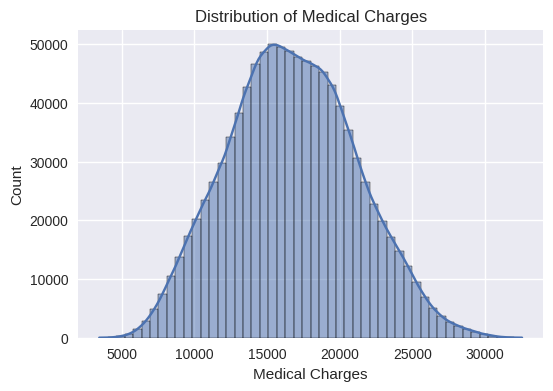

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["charges"], bins=50, kde=True)
plt.xlabel("Medical Charges")
plt.title("Distribution of Medical Charges")
plt.show()


## Target Variable Distribution (Raw Scale)

The distribution of medical charges is positively skewed with a long right tail.  
This indicates the presence of high-cost individuals and non-constant variance, which violates assumptions of ordinary least squares regression.

Such behavior is typical of insurance and healthcare cost data.


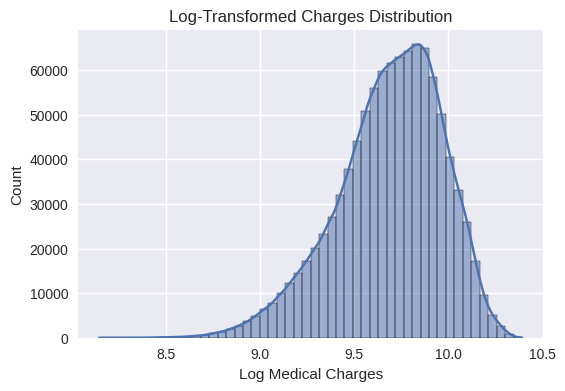

In [ ]:
df["log_charges"] = np.log(df["charges"])

plt.figure(figsize=(6,4))
sns.histplot(df["log_charges"], bins=50, kde=True)
plt.xlabel("Log Medical Charges")
plt.title("Log-Transformed Charges Distribution")
plt.show()


## Log-Transformed Charges Distribution

Applying a logarithmic transformation to medical charges significantly reduces extreme right skewness and stabilizes variance.

While the log-transformed distribution exhibits mild left skewness, this behavior is common in cost data and does not violate modeling assumptions.


## Modeling Implications

Medical charges exhibit skewness, heteroscedasticity, and strictly positive values.  
These characteristics support the use of models that assume non-Gaussian error distributions and multiplicative effects.

Based on these observations, generalized linear models with appropriate distributional assumptions (e.g., Gamma family with log link) are suitable as baseline pricing models.
